# Eastwest airlines problem

### Importing data

In [11]:
import pandas as pd
import numpy as np
airlines=pd.read_csv('EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Data preparation


In [12]:
del airlines['ID#']

In [13]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [14]:
airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [15]:
airlines.shape

(3999, 11)

In [16]:
from sklearn.preprocessing import normalize
airline2_norm=pd.DataFrame(normalize(airlines),columns=airlines.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [17]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

# Hierarchy clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
hclusters

AgglomerativeClustering(linkage='single', n_clusters=5)

In [19]:
AgglomerativeClustering=hclusters.fit_predict(airline2_norm)
AgglomerativeClustering

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
cluster_data=pd.DataFrame(AgglomerativeClustering,columns=['clusters'])
cluster_data

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [21]:
airline2_norm['clusters']=cluster_data
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [22]:
airline2_norm[airline2_norm['clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [23]:
airline2_norm[airline2_norm['clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
2903,0.543352,0.0,0.000187,0.000187,0.000187,0.543352,0.005434,0.543352,0.005434,0.338003,0.0,1
3824,0.568473,0.0,0.000103,0.000103,0.000103,0.568473,0.001137,0.568473,0.001137,0.174676,0.0,1


In [24]:
airline2_norm[airline2_norm['clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
3697,0.707105,0.707105,0.000727,0.000727,0.000727,0.0,0.0,0.0,0.0,0.001455,0.0,2
3747,0.773470,0.633821,0.000129,0.000129,0.000129,0.0,0.0,0.0,0.0,0.003858,0.0,2


In [25]:
airline2_norm[airline2_norm['clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
2996,0.0,0.0,0.000149,0.000149,0.000149,0.819511,0.002686,0.315805,0.000746,0.478185,0.000149,3


In [26]:
airline2_norm[airline2_norm['clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
958,0.562926,0.18102,0.000168,0.000042,0.000042,0.662128,0.00181,0.387209,0.001178,0.248992,0.000042,4


In [27]:
airline2_norm[airline2_norm['clusters']==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters


# K Means Clustering

In [28]:
airline2_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0


In [29]:
del airline2_norm['clusters']

In [30]:
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [31]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [32]:
import warnings
warnings.filterwarnings('ignore')
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

In [33]:
wcss

[484.85112913072544,
 267.59741095991905,
 173.27039396867056,
 116.3222283906487,
 90.82514805403557,
 70.47261345619675,
 60.07712044473634,
 51.93492446196252,
 47.2002379895115]

### Finding optimized n value using Elbow Method

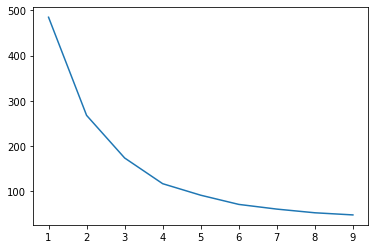

In [34]:
plt.plot(range(1,10),wcss)
plt.show()

In [35]:
x=KMeans(n_clusters=4,max_iter=500,algorithm='auto')
x.fit(airline2_norm)

KMeans(max_iter=500, n_clusters=4)

In [36]:
k_cluster=x.fit_predict(airline2_norm)
k_cluster

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
airline2_norm['k_clusters']=k_cluster
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,1
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,1
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [38]:
airline2_norm[airline2_norm['k_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
5,0.921066,0.0,0.000056,0.000056,0.000056,0.000000,0.000000,0.000000,0.000000,0.389406,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.988820,0.0,0.000088,0.000088,0.000088,0.082158,0.001061,0.000000,0.000000,0.124432,0.000000,0
3993,0.939884,0.0,0.000237,0.000237,0.000237,0.086326,0.000710,0.000000,0.000000,0.330402,0.000000,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [39]:
airline2_norm[airline2_norm['k_clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1
6,0.948504,0.0,0.000034,0.000011,0.000011,0.306979,0.000279,0.000000,0.000000,0.078124,0.000000,1
9,0.963153,0.0,0.000028,0.000009,0.000009,0.261097,0.000257,0.010563,0.000028,0.063662,0.000009,1
11,0.843373,0.0,0.000044,0.000009,0.000009,0.533912,0.000166,0.000000,0.000000,0.060499,0.000009,1
17,0.864115,0.0,0.000062,0.000062,0.000062,0.265648,0.000310,0.000000,0.000000,0.427476,0.000062,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3989,0.773631,0.0,0.000295,0.000295,0.000295,0.479462,0.001770,0.000000,0.000000,0.414255,0.000295,1
3990,0.908114,0.0,0.000080,0.000080,0.000080,0.403151,0.000161,0.000000,0.000000,0.113133,0.000000,1
3991,0.933406,0.0,0.000072,0.000024,0.000024,0.357247,0.000668,0.000000,0.000000,0.033576,0.000000,1
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,1


In [40]:
airline2_norm[airline2_norm['k_clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
15,0.495715,0.0,0.000070,0.000017,0.000017,0.860121,0.000261,0.000000,0.00000,0.120245,0.000017,2
16,0.723935,0.0,0.000056,0.000014,0.000014,0.683099,0.000223,0.000000,0.00000,0.096404,0.000014,2
41,0.259950,0.0,0.000099,0.000025,0.000025,0.945799,0.000646,0.000000,0.00000,0.194652,0.000025,2
58,0.739083,0.0,0.000058,0.000019,0.000019,0.660413,0.000155,0.000000,0.00000,0.132708,0.000000,2
61,0.725552,0.0,0.000036,0.000036,0.000036,0.641151,0.000401,0.000000,0.00000,0.249998,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3919,0.690972,0.0,0.000138,0.000138,0.000138,0.690972,0.000138,0.000000,0.00000,0.212405,0.000000,2
3924,0.717213,0.0,0.000049,0.000049,0.000049,0.692942,0.000437,0.000000,0.00000,0.073736,0.000000,2
3930,0.675402,0.0,0.000067,0.000017,0.000017,0.736988,0.000434,0.005731,0.00005,0.025446,0.000017,2
3944,0.610014,0.0,0.000287,0.000287,0.000287,0.667454,0.000574,0.000000,0.00000,0.427067,0.000287,2


In [41]:
airline2_norm[airline2_norm['k_clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
27,0.744601,0.0,0.000084,0.000084,0.000084,0.000000,0.000000,0.0,0.0,0.667510,0.000000,3
31,0.786114,0.0,0.000078,0.000078,0.000078,0.000000,0.000000,0.0,0.0,0.618081,0.000000,3
39,0.267219,0.0,0.000123,0.000123,0.000123,0.000000,0.000000,0.0,0.0,0.963636,0.000123,3
51,0.185721,0.0,0.000143,0.000143,0.000143,0.052859,0.000143,0.0,0.0,0.981180,0.000000,3
62,0.827595,0.0,0.000082,0.000082,0.000082,0.000000,0.000000,0.0,0.0,0.561325,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3861,0.885875,0.0,0.000283,0.000283,0.000283,0.028339,0.000283,0.0,0.0,0.463058,0.000000,3
3876,0.530714,0.0,0.000531,0.000531,0.000531,0.000000,0.000000,0.0,0.0,0.847550,0.000000,3
3942,0.811517,0.0,0.000381,0.000381,0.000381,0.154230,0.001142,0.0,0.0,0.563606,0.000000,3
3981,0.578796,0.0,0.000573,0.000573,0.000573,0.000000,0.000000,0.0,0.0,0.815472,0.000000,3


In [42]:
airline2_norm[airline2_norm['k_clusters']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters


# DBSCAN

In [43]:
airline2_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1


In [44]:
del airline2_norm['k_clusters']

In [45]:
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [46]:
from sklearn.cluster import DBSCAN

In [47]:
dbs=DBSCAN(min_samples=2,eps=0.2)

In [48]:
dbs_cluster=dbs.fit_predict(airline2_norm)
dbs_cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
airline2_norm['dbs_clusters']=dbs_cluster

In [50]:
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [51]:
airline2_norm[airline2_norm['dbs_clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [52]:
airline2_norm[airline2_norm['dbs_clusters']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
2903,0.543352,0.0,0.000187,0.000187,0.000187,0.543352,0.005434,0.543352,0.005434,0.338003,0.0,1
3824,0.568473,0.0,0.000103,0.000103,0.000103,0.568473,0.001137,0.568473,0.001137,0.174676,0.0,1


In [53]:
airline2_norm[airline2_norm['dbs_clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters
3697,0.707105,0.707105,0.000727,0.000727,0.000727,0.0,0.0,0.0,0.0,0.001455,0.0,2
3747,0.773470,0.633821,0.000129,0.000129,0.000129,0.0,0.0,0.0,0.0,0.003858,0.0,2


In [54]:
airline2_norm[airline2_norm['dbs_clusters']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbs_clusters


### conclusion:For this problem,in the above all the models hierarchy model is the optimized clustering since it as more clusters compare to kmeans and dbscan